<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Introduction to NumPy](02.00-Introduction-to-NumPy.ipynb) | [Contents](Index.ipynb) | [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.01-Understanding-Data-Types.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Understanding Data Types in Python

Effective data-driven science and computation requires understanding how data is stored and manipulated.
This section outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this.
Understanding this difference is fundamental to understanding much of the material throughout the rest of the book.

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing.
While a statically-typed language like C or Java requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i    ### += will not create a new varialbe, it will alter current variable
```

Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

Here we've switched the contents of ``x`` from an integer to a string. The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed languages convenient and easy to use.
Understanding *how* this works is an important piece of learning to analyze data efficiently and effectively with Python.
But what this type-flexibility also points to is the fact that Python variables are more than just their value; they also contain extra information about the type of the value. We'll explore this more in the sections that follow.

## A Python Integer Is More Than Just an Integer

The standard Python implementation is written in C.
This means that every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as ``x = 10000``, ``x`` is not just a "raw" integer. It's actually a pointer to a compound C structure, which contains several values.
Looking through the Python 3.4 source code, we find that the integer (long) type definition effectively looks like this (once the C macros are expanded):

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- ``ob_refcnt``, a reference count that helps Python silently handle memory allocation and deallocation
- ``ob_type``, which encodes the type of the variable
- ``ob_size``, which specifies the size of the following data members
- ``ob_digit``, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C, as illustrated in the following figure:

![Integer Memory Layout](figures/cint_vs_pyint.png)

Here ``PyObject_HEAD`` is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value.
A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.
This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.
All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

## A Python List Is More Than Just a List

Let's consider now what happens when we use a Python data structure that holds many Python objects.
The standard mutable multi-element container in Python is the list.
We can create a list of integers as follows:

In [2]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
type(L[0])

int

Or, similarly, a list of strings:

In [4]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:

In [6]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object.
In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.
The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

![Array Memory Layout](figures/array_vs_list.png)

At the implementation level, the array essentially contains a single pointer to one contiguous block of data.
The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier.
Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.
Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## Fixed-Type Arrays in Python

Python offers several different options for storing data in efficient, fixed-type data buffers.
The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [9]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here ``'i'`` is a type code indicating the contents are integers.

Much more useful, however, is the ``ndarray`` object of the NumPy package.
While Python's ``array`` object provides efficient storage of array-based data, NumPy adds to this efficient *operations* on that data.
We will explore these operations in later sections; here we'll demonstrate several ways of creating a NumPy array.

We'll start with the standard NumPy import, under the alias ``np``:

In [2]:
import numpy as np

## Creating Arrays from Python Lists

First, we can use ``np.array`` to create arrays from Python lists:

In [8]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [9]:
np.array([3.14, 4, 2, 3])

array([ 3.14,  4.  ,  2.  ,  3.  ])

In [13]:
np.array([3.14, 4, 2, "hello"])

array(['3.14', '4', '2', 'hello'], dtype='<U32')

If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [19]:
np.array([1, 2, 3, 4], dtype='int')

array([1, 2, 3, 4])

In [16]:
np.array([1, 2, 3, 4], dtype='str')

array(['1', '2', '3', '4'], dtype='<U1')

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [11]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [31]:
wz1 = [range(i,i+3) for i in range(10)]

In [33]:
wz1

[range(0, 3),
 range(1, 4),
 range(2, 5),
 range(3, 6),
 range(4, 7),
 range(5, 8),
 range(6, 9),
 range(7, 10),
 range(8, 11),
 range(9, 12)]

In [32]:
np.array(wz1)

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11]])

In [51]:
np.array(wz1).shape

(10, 3)

In [55]:
np.array([1, 2, 3], ndmin=3)

array([[[1, 2, 3]]])

In [54]:
np.array([1, 2, 3], ndmin=3).shape

(1, 1, 3)

In [48]:
np.array([1, 2, 3], ndmin=2).shape

(1, 3)

In [60]:
# Data-type consisting of more than one element:
np.array([(1,2),(3,4)],dtype=[('a','int'),('b','int')])

array([(1, 2), (3, 4)], dtype=[('a', '<i8'), ('b', '<i8')])

In [53]:
np.array([(1,2),(3,4)])

array([[1, 2],
       [3, 4]])

In [5]:
np.array([(1,2),(3,4)])[1]

array([3, 4])

In [6]:
np.array([(1,2),(3,4)])[1,0]

3

The inner lists are treated as rows of the resulting two-dimensional array.

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

In [7]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [17]:
np.ones([5,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
np.ones((5,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [14]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [22]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [20]:
np.array(range(0,20,2))

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [21]:
for i in range(0,20,2):
    print(i)

0
2
4
6
8
10
12
14
16
18


In [25]:
np.arange(0,10.1,2, dtype = int)

array([ 0,  2,  4,  6,  8, 10])

In [16]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [28]:
np.linspace(0,10,6, dtype = int)

array([ 0,  2,  4,  6,  8, 10])

In [17]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[ 0.99844933,  0.52183819,  0.22421193],
       [ 0.08007488,  0.45429293,  0.20941444],
       [ 0.14360941,  0.96910973,  0.946117  ]])

In [31]:
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 1000)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


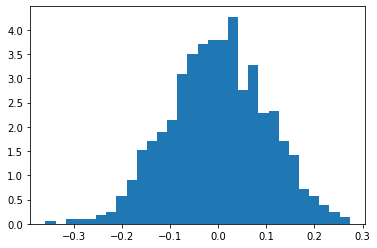

In [42]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


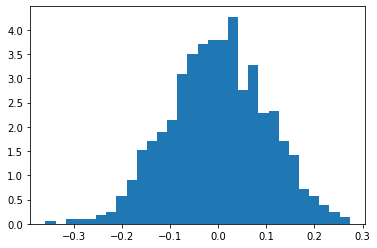

In [48]:
# the plt.hist object is a 3 dimension tuple, its values are:
## count of each bin (y axis)
## bin values (x axis)
## shape of bins
count, bins, ignored = plt.hist(s, 30, normed=True)  

In [49]:
bins

array([-0.35849905, -0.33743921, -0.31637937, -0.29531953, -0.2742597 ,
       -0.25319986, -0.23214002, -0.21108018, -0.19002034, -0.1689605 ,
       -0.14790067, -0.12684083, -0.10578099, -0.08472115, -0.06366131,
       -0.04260147, -0.02154164, -0.0004818 ,  0.02057804,  0.04163788,
        0.06269772,  0.08375755,  0.10481739,  0.12587723,  0.14693707,
        0.16799691,  0.18905675,  0.21011658,  0.23117642,  0.25223626,
        0.2732961 ])

In [18]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 1.51772646,  0.39614948, -0.10634696],
       [ 0.25671348,  0.00732722,  0.37783601],
       [ 0.68446945,  0.15926039, -0.70744073]])

In [50]:
np.random.normal(0,1, (3,5))

array([[ 0.6664891 ,  1.02762786,  0.61454226, -0.18200896, -0.24021553],
       [ 1.48350884, -0.50021953, -0.12431912, -0.93796653,  0.68340314],
       [-1.59208816, -1.11909251, -1.04836078,  0.93643015, -0.48214476]])

In [57]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, size=(3, 3))

array([[9, 6, 9],
       [7, 0, 6],
       [6, 7, 5]])

In [20]:
# Create a 3x3 identity matrix
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [51]:
np.eye(3, dtype = int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [21]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([ 1.,  1.,  1.])

In [52]:
np.empty(3)

array([3.5e-323, 4.0e-323, 4.4e-323])

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types, which will be covered in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).

<!--NAVIGATION-->
< [Introduction to NumPy](02.00-Introduction-to-NumPy.ipynb) | [Contents](Index.ipynb) | [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.01-Understanding-Data-Types.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
